<a href="https://colab.research.google.com/github/viditkhemka63/Machine-learning-journey/blob/master/Movie_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [0]:
import pandas as pd
import numpy as np

In [72]:
train = pd.read_csv('train.tsv', sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [73]:
test  = pd.read_table('test.tsv')
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [53]:
train.shape

(156060, 4)

In [54]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
from keras.preprocessing import text

In [0]:
tokenizer = text.Tokenizer()

In [0]:
tokenizer.fit_on_texts(train['Phrase'])


In [0]:
print('Word count in tokenizer',tokenizer.word_counts)
print('document count in tokenizer',tokenizer.document_count)

Word count in tokenizer OrderedDict([('a', 36415), ('series', 363), ('of', 32702), ('escapades', 5), ('demonstrating', 19), ('the', 51633), ('adage', 17), ('that', 12338), ('what', 1926), ('is', 13476), ('good', 2261), ('for', 7553), ('goose', 43), ('also', 659), ('gander', 9), ('some', 1713), ('which', 1360), ('occasionally', 184), ('amuses', 10), ('but', 5126), ('none', 209), ('amounts', 60), ('to', 22761), ('much', 1872), ('story', 2539), ('this', 5677), ('quiet', 153), ('introspective', 23), ('and', 32177), ('entertaining', 613), ('independent', 42), ('worth', 503), ('seeking', 54), ('even', 1624), ('fans', 412), ('ismail', 6), ('merchant', 35), ("'s", 16971), ('work', 1272), ('i', 1811), ('suspect', 23), ('would', 1151), ('have', 3134), ('hard', 718), ('time', 1919), ('sitting', 111), ('through', 1115), ('one', 3784), ('positively', 38), ('thrilling', 29), ('combination', 77), ('ethnography', 7), ('all', 3401), ('intrigue', 129), ('betrayal', 29), ('deceit', 14), ('murder', 134), 

In [0]:
len(tokenizer.word_counts)

15288

## Import libs for text preprocessing

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
from keras.utils import to_categorical
import random
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from tqdm import tqdm # for visualize the progress

lemmatizer = WordNetLemmatizer()



In [75]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Method for cleaning the reviews, tokenize and lemmatize them

In [76]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

  0%|          | 0/156060 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|██████████| 66292/66292 [00:30<00:00, 2186.10it/s]

156060
66292


In [66]:
print(train_sentences[0])

['a', 'series', 'of', 'escapade', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amount', 'to', 'much', 'of', 'a', 'story']


In [0]:
target=train.Sentiment.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]


In [0]:
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2)

In [79]:
print(X_val)

[['of', 'it', 'character', 'it', 'protagonist'], ['belly', 'laugh'], ['the', 'wit', 'necessary', 'to', 'fully', 'exploit', 'the', 'comic', 'element', 'of', 'the', 'premise', 'making', 'the', 'proceeding', 'more', 'bizarre', 'than', 'actually', 'amusing'], ['a', 'visual', 'spectacle', 'full', 'of', 'stunning', 'image', 'and', 'effect'], ['you', 'feel', 'good', 'you', 'feel', 'sad'], ['of', 'the', 'greatest', 'date', 'movie', 'in', 'year'], ['the', 'highest'], ['redundant', 'concept'], ['that', 'tug', 'at', 'your', 'heart', 'in', 'way', 'that', 'utterly', 'transcend', 'gender'], ['still', 'need', 'to', 'grow', 'into'], ['the', 'universal', 'theme'], ['shafer', 's', 'feature'], ['start', 'out', 'bizarre', 'and', 'just'], ['the', 'problematic', 'character', 'and', 'overly', 'convenient', 'plot', 'twist'], ['seem', 'smart', 'and', 'well', 'crafted', 'in', 'comparison'], ['a', 'an', 'abstract', 'frank', 'tashlin', 'comedy', 'and', 'a', 'a', 'playful', 'recapitulation', 'of', 'the', 'artist',

In [80]:
unique_words = set()
len_max = 0

for sent in tqdm(X_train):
  
  unique_words.update(sent)
  
  if(len_max < len(sent)):
    len_max = len(sent)
    
print(len(list(unique_words)))
print(len_max)

100%|██████████| 124848/124848 [00:00<00:00, 420042.73it/s]


13735
48


In [65]:
print(X_val)

[[428], [1164, 1833, 1833, 808, 1304, 45, 155], [69, 521], [5, 6784], [11509], [99, 10648], [248, 71, 5403, 466, 6], [5, 1, 2435, 11103, 2, 1072, 2063, 3, 15, 1334, 591, 46, 9203, 88, 397, 8, 1764, 4, 1655, 51, 8, 1246], [104, 57, 1372, 31, 16, 642, 8225, 3183, 3, 1, 12, 10, 895, 594], [1515, 40], [441], [8197], [162, 725, 4, 13523, 1081, 11037, 7, 960, 3, 83, 609, 159, 2090, 2, 26, 49, 1935, 66, 341, 2780], [2, 508, 10625, 926], [10328, 574], [4846, 1, 6169, 51, 3, 1, 38, 8, 26, 12, 58, 166], [979, 2746, 4056], [7233], [80, 7, 1, 1731], [11, 431, 4209, 3, 78, 352, 397, 1653, 2197, 136, 2197, 241, 2151, 100, 2594, 1809, 568, 2218, 8960, 4, 1, 2215, 3030, 3, 1, 9628], [1, 806, 5029], [2, 2435, 73, 24, 12758, 7917, 2, 15, 1041, 2419, 3579, 250], [16, 395, 232, 53], [6615], [13494, 10, 6, 7, 1, 6498, 3, 6, 92, 307], [11073], [3031, 1, 69, 462], [150, 1026, 4, 2875, 1071], [9, 107, 166, 31, 403], [457, 314], [8688], [829, 56, 16, 40, 9, 138, 33, 28], [662, 5, 4188, 14, 2, 13, 10, 6, 308, 2

In [0]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))

In [81]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.
X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)
print(X_train.shape,X_val.shape,X_test.shape)

(124848, 48) (31212, 48) (66292, 48)


In [82]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

#Model using Keras LSTM
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

W0618 07:18:18.981976 140117496706944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 07:18:19.044334 140117496706944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 07:18:19.056507 140117496706944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 07:18:19.223905 140117496706944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0618 07:18:19.240750 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 48, 300)           4120500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 48, 128)           219648    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 4,396,561
Trainable params: 4,396,561
Non-trainable params: 0
_________________________________________________________________


In [83]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=6, batch_size=256, verbose=1, callbacks=callback)

W0618 07:18:47.491386 140117496706944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 124848 samples, validate on 31212 samples
Epoch 1/6
124848/124848 [==============================] - 435s 3ms/step - loss: 1.0041 - acc: 0.5943 - val_loss: 0.8492 - val_acc: 0.6464
Epoch 2/6
124848/124848 [==============================] - 431s 3ms/step - loss: 0.8079 - acc: 0.6697 - val_loss: 0.8117 - val_acc: 0.6615
Epoch 3/6
124848/124848 [==============================] - 430s 3ms/step - loss: 0.7379 - acc: 0.6949 - val_loss: 0.8126 - val_acc: 0.6626
Epoch 4/6
124848/124848 [==============================] - 431s 3ms/step - loss: 0.6994 - acc: 0.7079 - val_loss: 0.8284 - val_acc: 0.6762
Epoch 5/6
124848/124848 [==============================] - 431s 3ms/step - loss: 0.6709 - acc: 0.7203 - val_loss: 0.8356 - val_acc: 0.6689
Epoch 6/6
124848/124848 [==============================] - 431s 3ms/step - loss: 0.6542 - acc: 0.7264 - val_loss: 0.8811 - val_acc: 0.6711


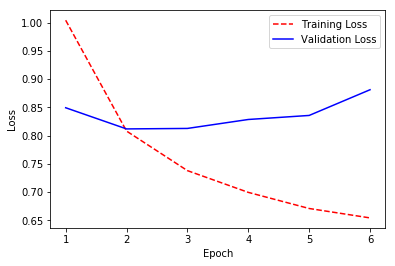

In [84]:
import matplotlib.pyplot as plt

# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.
#As mentioned before, altering different hyper parameters especially learning rate can have a positive impact
#on accuracy and learning curve.
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()